In [7]:
from skimage import color, img_as_float
from skimage.exposure import rescale_intensity
from skimage.restoration import unwrap_phase
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import nbformat
from mpl_toolkits.mplot3d import Axes3D

In [8]:
def load_and_preprocess_image(image_path):
    # Leer la imagen como un array
    img = np.array(Image.open(image_path))

    # Verificar si la imagen tiene 4 canales
    if img.shape[-1] == 4:
        # Si tiene 4 canales, convertir a RGB eliminando el canal alfa
        img = img[..., :3]

    # Convertir a escala de grises
    img_gray = color.rgb2gray(img_as_float(img))

    # Escalar la intensidad
    img_scaled = rescale_intensity(img_gray, out_range=(0, 4 * np.pi))

    return img_gray

def S(x):
    angulo=11.18*np.pi/180
    return (0.02/2*np.pi)*np.cos(angulo)*((np.sin(angulo)+((77.5-79*np.cos(angulo))/(79*77.5))*x*0.02985)**-1)*(1+x*0.02985*np.sin(angulo)/79)**2
def vector_a_matriz(vector, num_filas):
    # Convierte el vector en una matriz con una sola fila
    matriz = np.array(vector)
    # Repite cada elemento del vector en columnas
    matriz = np.tile(matriz, (num_filas, 1))
    return matriz

# Load and preprocess images
I1 = load_and_preprocess_image("DSC_2047.JPG")
I2 = load_and_preprocess_image("DSC_2048.JPG")
I3 = load_and_preprocess_image("DSC_2049.JPG")
I4 = load_and_preprocess_image("DSC_2050.JPG")

I_1 = load_and_preprocess_image("DSC_2043.JPG")
I_2 = load_and_preprocess_image("DSC_2044.JPG")
I_3 = load_and_preprocess_image("DSC_2045.JPG")
I_4 = load_and_preprocess_image("DSC_2046.JPG")

# Calculate wrapped phase
I_wrapped = np.arctan2(I4 - I2, I1 - I3)
I_wrapped_r = np.arctan2(I_4 - I_2, I_1 - I_3)
# Unwrap phase
I_unwrapped = unwrap_phase(I_wrapped)
I_unwrapped_r = unwrap_phase(I_wrapped_r)


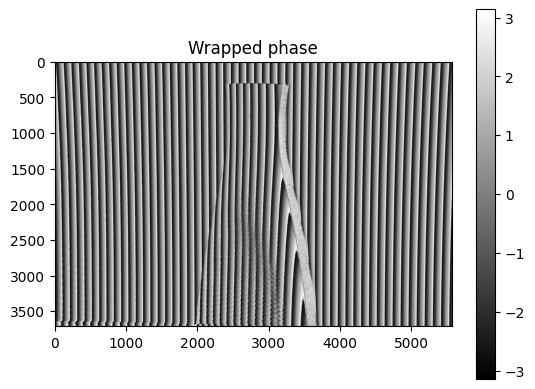

In [9]:
# Plot wrapped phase
cmap_wrapped = plt.imshow(I_wrapped, cmap='gray', vmin=-np.pi, vmax=np.pi)
plt.colorbar(cmap_wrapped)
plt.title('Wrapped phase')
plt.show()

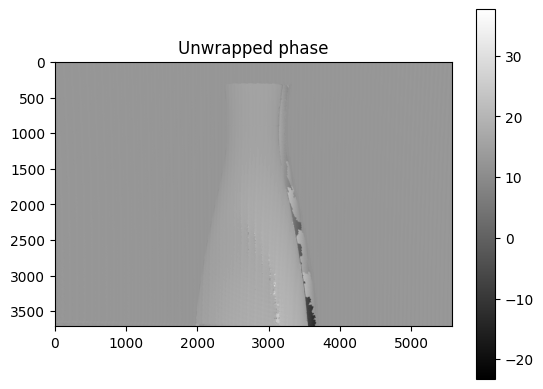

In [10]:
# Plot unwrapped phase
cmap_unwrapped = plt.imshow(I_unwrapped-I_unwrapped_r, cmap='gray')
plt.colorbar(cmap_unwrapped)
plt.title('Unwrapped phase')
plt.show()

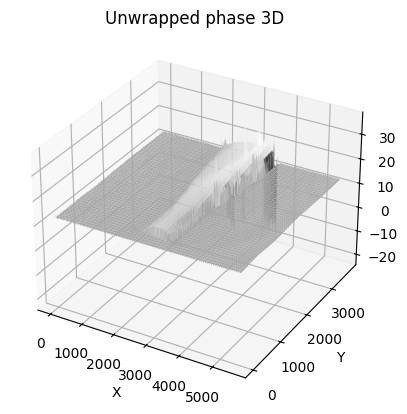

In [11]:
image_unwrapped=(I_unwrapped-I_unwrapped_r)

#plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(np.arange(image_unwrapped.shape[1]), np.arange(image_unwrapped.shape[0]))
ax.plot_surface(x, y, image_unwrapped,cmap='grey')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Value')
ax.set_title('Unwrapped phase 3D')

plt.show()


5.98060275907663


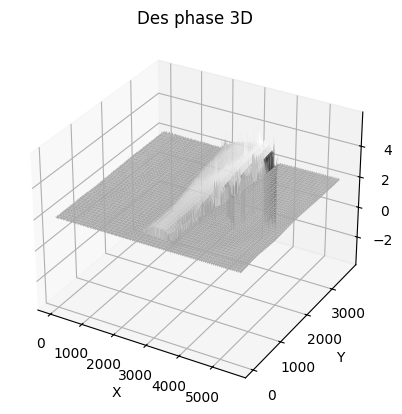

In [12]:
angulo=11.18
d=0.02
z=(image_unwrapped/2*np.pi)*(d/np.tan(angulo*np.pi/180))
print(np.max(z))
#plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(np.arange(image_unwrapped.shape[1]), np.arange(image_unwrapped.shape[0]))
ax.plot_surface(x, y, z,cmap='grey')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Value')
ax.set_title('Des phase 3D')

plt.show()